# CH_03-6 Pima Indian Diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

#import warnings
#warnings.filterwarnings('ignore')

#### import matplotlib.pyplot as plt → 매트랩에서 주로 사용하는 함수들을 포함 ex) 함수를 그래프로 나타낼 때 <br/>
#### %matplotlib inline → jupyter lab이나 notebook를 실행한 browser에서 바로 그림을 볼 수 있게 해주는 것 <br/>
#### from sklearn.preprocessing → 데이터 값 표준화를 할 때 사용되는 것 <br/>
#### from sklearn.linear_model → 선형 회귀 분석을 할 때 주로 사용되는 것

## 1. 데이터 세트 확인
* Pregnancies : 임신 횟수
* Glucose : 포도당 부하 검사 수치
* BloodPressure : 혈압
* SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
* Insulin : 혈청 인슐린
* BMI : 체질량 지수
* DiabetesPedigreeFunction : 당뇨 내력 가중치 값
* Age : 나이
* Outcome : 결정 값(0 or 1)

In [2]:
diabetes_data = pd.read_csv('C:/Users/creade/data_science/diabetes/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. 함수 생성

In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(f1))
    print('AUC: {:.4f}'.format(roc_auc))
    
    #print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:,4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get classification evaluation - 분류 평가를 시행하다.

정확도 - 예측 값과 실제 값이 동일한 건수 / 전체 건수<br/>
정밀도 - 예측 값과 실제 값이 동일한 건수 / 긍정이라고 평가한 건수<br/>
재현율 - 예측 값과 실제 값이 동일한 건수 / 실제로 긍정인 건수<br/>
F1 score - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 가지는 점수<br/>
<br/>
ROC AUC 
- ROC : FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선<br/>
- TPR = True Positive Rate(재현율)<br/>
- FPR = False Positive Rate<br/>
- AUC : ROC 곡선에서 곡선 밑의 면적을 구한 것, 일반적으로 1에 가까울수록 좋다.

In [5]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

정밀도 재현율 곡선

In [6]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict,pred_proba_c1)

        print(" ")

In [8]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression(max_iter=200)
#lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)
#경사하강법은 근삿값을 발견하는 최적화 알고리즘을 말한다.
#로지스틱 회귀분석에서 사용되는 것이 경사하강법인데, 오류가 발생하는 이유는 데이터의 전처리가 부족했거나 수렴을 하기 전까지 충분히 반복 시행이 되지 않았기 때문이다.

오차 행렬
[[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.8072


x - diabetes data set에서 outcome(결정값)을 제외한 값을 다 불러온다. <br/>
y - diabetes data set에서 outcome(결정값)을 다 불러온다. <br/>
stratify - test_size를 유지한 채 분리할 것인가? <br/>
fit - 그래프의 계수와 절편 전달 <br/>
predict - 새로운 속성을 넣었을 때, 그 레이블에 속하는지 1과 0으로 구성된 벡터를 반환한다. <br/>
predict_proba - test Data의 확률을 반환한다. <br/>

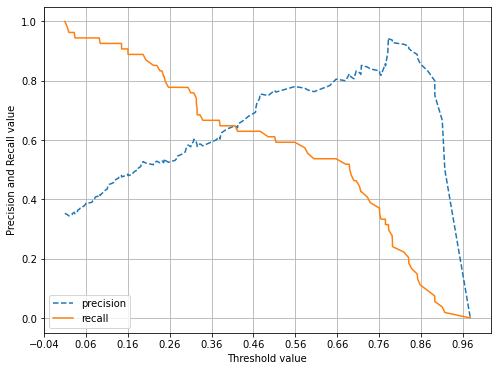

In [9]:
#pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [16]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

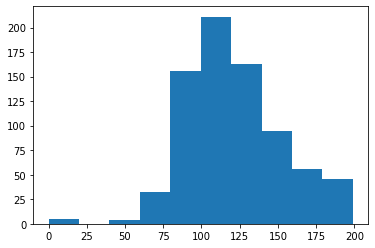

In [17]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [18]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', "BMI"]

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [19]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [20]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', "BMI"]

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [21]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.8433


In [22]:
thresholds = [0.3 , 0.33 ,0.36, 0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]

정확도: 0.7143
정밀도: 0.5658
재현율: 0.7963
F1: 0.6615
AUC: 0.8433
 
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]

정확도: 0.7403
정밀도: 0.6000
재현율: 0.7778
F1: 0.6774
AUC: 0.8433
 
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]

정확도: 0.7468
정밀도: 0.6190
재현율: 0.7222
F1: 0.6667
AUC: 0.8433
 
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]

정확도: 0.7532
정밀도: 0.6333
재현율: 0.7037
F1: 0.6667
AUC: 0.8433
 
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]

정확도: 0.7792
정밀도: 0.6923
재현율: 0.6667
F1: 0.6792
AUC: 0.8433
 
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]

정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857
AUC: 0.8433
 
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.8433
 
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.8433
 


In [23]:
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.8433
